# Reading Krakow data

The Krakow data comes in hdf5 format, each data set contains a variable. We use `h5py`to read the data into a dictionary-like data structure

In [131]:
import h5py
import pandas as pd

In [132]:
krakov = h5py.File("../data/observations/Krakow_AMS_PMF_moz_data.h5","r")

In [133]:
list(krakov.keys())

['BBOA',
 'BC6',
 'CCOA',
 'Chl_30',
 'DateUTC',
 'HOA',
 'LO_OOA',
 'MO_OOA',
 'NH4_30',
 'NO3_30',
 'OOA',
 'OrgSpecs_err_30',
 'Org_30',
 'Org_Specs_30',
 'Packages',
 'SO4_30',
 'S_fileName',
 'S_path',
 'S_waveNames',
 'V_Flag',
 'acsm_utc_time_30',
 'amus']

In [99]:
krakov['BBOA']

<HDF5 dataset "BBOA": shape (16273,), type "<f8">

The `Org_Specs_30` dataset holds the `m/z` values coming from the mass spectometer. 

In [100]:
krakov['Org_Specs_30']

<HDF5 dataset "Org_Specs_30": shape (16286, 93), type "<f4">

The dataset `amus`contains the `m/z`name, this can be considered as the variable name.

In [101]:
krakov['amus']

<HDF5 dataset "amus": shape (93,), type "<f4">

In [102]:
krakov['amus'][0]

12.0

We create a data frame with column names given by the `amus` data field and with rows given by the elements of the `Org_Specs_30` dataset

In [103]:
krakov_df = pd.DataFrame(krakov['Org_Specs_30'], columns = [str(int(amus)) for amus in krakov['amus']])

krakov_df

,12,13,15,16,17,18,24,25,26,27,...,111,112,113,114,115,116,117,118,119,120
0,-0.003523,0.042046,0.341372,0.018782,0.117385,0.469542,0.004058,0.026456,0.081814,0.046262,...,0.026082,0.019182,0.021737,0.015301,0.041879,0.016196,0.027027,0.014819,0.034483,0.012276
1,-0.150227,-0.008195,0.022245,0.003168,0.019797,0.079189,0.000597,-0.013850,0.063849,0.084627,...,0.016773,0.021456,0.019668,0.017158,0.043933,0.014488,0.018494,0.020011,0.025490,0.019865
2,-0.073763,-0.012552,0.004427,0.010750,0.067189,0.268756,0.004334,0.007637,0.104142,-0.009910,...,0.023564,0.006726,0.037375,0.008389,0.036188,0.011742,0.017189,0.013873,0.039163,0.019338
3,-0.118308,0.038575,0.088323,0.019541,0.122133,0.488532,-0.003255,0.020286,0.061825,0.127102,...,0.019575,0.023191,0.015848,0.012163,0.043554,0.012909,0.020370,0.013007,0.028607,0.021247
4,-0.120782,0.000762,0.020262,0.024266,0.151665,0.606660,0.005013,0.022284,0.086115,0.168124,...,0.015858,0.010879,0.032698,0.011473,0.044271,0.017018,0.012387,0.009406,0.036408,0.017181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16281,0.027184,0.050378,0.293053,0.109473,0.684207,2.736828,0.019358,0.033263,0.118950,0.379278,...,0.022693,0.013698,0.013684,0.011438,0.042559,0.023342,0.015661,0.004957,0.032708,0.014308
16282,0.060938,0.090977,0.232242,0.108391,0.677442,2.709769,0.003126,0.051296,0.170406,0.410444,...,0.034125,0.013260,0.021385,0.006524,0.024382,0.006796,0.014281,0.007714,0.012998,0.024054
16283,-0.050615,0.038717,0.399933,0.098784,0.617403,2.469612,0.015264,0.049599,0.181920,0.611250,...,0.030354,0.011480,0.014770,0.020186,0.032451,0.002959,0.019330,0.016856,0.026634,0.018623
16284,-0.067085,-0.026272,0.064406,0.108196,0.676224,2.704895,0.012406,0.020887,0.193198,0.575019,...,0.027115,0.013475,0.017990,0.008151,0.032363,0.021530,0.012372,0.013851,0.030022,0.017127


## Issue with dates

The dates are supposed to come in UTC format, but I am having problems converting them to the supposed start date 08.01.2018

In [104]:
krakov['DateUTC']

<HDF5 dataset "DateUTC": shape (16273,), type "<f8">

In [105]:
krakov['DateUTC'][0]

3598270200.0

In [106]:
import datetime as dt

dt.datetime.fromtimestamp(int(krakov['DateUTC'][1]), tz=dt.timezone.utc) - dt.datetime(2019,4,10,tzinfo=dt.timezone.utc)

datetime.timedelta(days=23650, seconds=57600)

We also have the issue that the variables coming from the PMF have less rows than the raw data

In [59]:
1/2.34

0.4273504273504274

In contrast the difference betwen the first and last timestamp seems to coincide to 1.25 if each stamp corresponds to 1 sec

In [107]:
sampling_time = np.diff(np.array(krakov['DateUTC']))
sampling_time

array([1800., 1800., 1800., ..., 1800., 1800., 1800.])

In [108]:
import numpy as np
np.array(krakov['DateUTC'])

array([3.5982702e+09, 3.5982720e+09, 3.5982738e+09, ..., 3.6377208e+09,
       3.6377226e+09, 3.6377244e+09])

In [109]:
delta = dt.datetime(2019,4,10) - dt.datetime(2018,1,8)
(delta.total_seconds()) / (1800*16273)

1.3479997541940638

Which is 9 days more than what is reported in the paper (the sampling finished in 10.04.2019)

In [119]:
dt.timedelta(seconds=1800*(16286-16273)).seconds // 60 // 60

6

Let's see the difference between time stamps of DateUTC

In [124]:
x=np.diff(np.array(krakov['DateUTC']))
unique, counts = np.unique(x, return_counts=True)

print(np.asarray((unique, counts)).T)

[[1.8000e+03 1.6217e+04]
 [3.6000e+03 6.0000e+00]
 [5.4000e+03 2.0000e+00]
 [7.2000e+03 1.0000e+00]
 [1.0800e+04 1.0000e+00]
 [1.2600e+04 3.0000e+00]
 [1.6200e+04 1.0000e+00]
 [2.5200e+04 2.0000e+00]
 [2.7000e+04 1.0000e+00]
 [3.0600e+04 1.0000e+00]
 [3.2400e+04 1.0000e+00]
 [4.8600e+04 1.0000e+00]
 [5.4000e+04 1.0000e+00]
 [5.5800e+04 2.0000e+00]
 [5.7600e+04 1.0000e+00]
 [6.3000e+04 1.0000e+00]
 [7.2000e+04 1.0000e+00]
 [7.3800e+04 1.0000e+00]
 [8.1000e+04 3.0000e+00]
 [8.6400e+04 1.0000e+00]
 [9.9000e+04 1.0000e+00]
 [1.0080e+05 1.0000e+00]
 [1.0620e+05 2.0000e+00]
 [1.5300e+05 1.0000e+00]
 [1.6020e+05 1.0000e+00]
 [1.8000e+05 1.0000e+00]
 [1.9080e+05 1.0000e+00]
 [2.0160e+05 1.0000e+00]
 [2.0880e+05 1.0000e+00]
 [2.2500e+05 1.0000e+00]
 [2.5020e+05 1.0000e+00]
 [2.5560e+05 1.0000e+00]
 [2.5920e+05 1.0000e+00]
 [2.6280e+05 1.0000e+00]
 [2.9160e+05 1.0000e+00]
 [3.2940e+05 1.0000e+00]
 [3.6360e+05 1.0000e+00]
 [4.1040e+05 1.0000e+00]
 [4.9860e+05 1.0000e+00]
 [5.3820e+05 1.0000e+00]


We observe that there are quite some missing points

In [127]:
np.sum(counts[counts < np.max(counts)])

55

In [134]:
dt.timedelta(seconds=int(krakov['DateUTC'][1])) + dt.datetime(1904,1,1,0,0,tzinfo=dt.timezone.utc)

datetime.datetime(2018, 1, 8, 16, 0, tzinfo=datetime.timezone.utc)

*IMPORTANT* Turns out the epoch in Igor Pro is 01 01 1904!

# Creating the data frames

In [144]:
igor_epoch = np.datetime64('1904-01-01')
krakov_timestamps = np.array(krakov['acsm_utc_time_30'])
igor_times = igor_epoch + krakov_timestamps.astype("timedelta64[s]")
igor_times

array(['2018-01-08T15:30:00', '2018-01-08T16:00:00',
       '2018-01-08T16:30:00', ..., '2019-04-10T06:00:00',
       '2019-04-10T06:30:00', '2019-04-10T07:00:00'],
      dtype='datetime64[s]')

In [146]:
krakov_df = pd.DataFrame(krakov['Org_Specs_30'],
                         columns = [str(int(amus)) for amus in krakov['amus']],
                         index = igor_times)

krakov_df.index.name = "timestamp"
krakov_df

,12,13,15,16,17,18,24,25,26,27,...,111,112,113,114,115,116,117,118,119,120
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-08 15:30:00,-0.003523,0.042046,0.341372,0.018782,0.117385,0.469542,0.004058,0.026456,0.081814,0.046262,...,0.026082,0.019182,0.021737,0.015301,0.041879,0.016196,0.027027,0.014819,0.034483,0.012276
2018-01-08 16:00:00,-0.150227,-0.008195,0.022245,0.003168,0.019797,0.079189,0.000597,-0.013850,0.063849,0.084627,...,0.016773,0.021456,0.019668,0.017158,0.043933,0.014488,0.018494,0.020011,0.025490,0.019865
2018-01-08 16:30:00,-0.073763,-0.012552,0.004427,0.010750,0.067189,0.268756,0.004334,0.007637,0.104142,-0.009910,...,0.023564,0.006726,0.037375,0.008389,0.036188,0.011742,0.017189,0.013873,0.039163,0.019338
2018-01-08 17:00:00,-0.118308,0.038575,0.088323,0.019541,0.122133,0.488532,-0.003255,0.020286,0.061825,0.127102,...,0.019575,0.023191,0.015848,0.012163,0.043554,0.012909,0.020370,0.013007,0.028607,0.021247
2018-01-08 17:30:00,-0.120782,0.000762,0.020262,0.024266,0.151665,0.606660,0.005013,0.022284,0.086115,0.168124,...,0.015858,0.010879,0.032698,0.011473,0.044271,0.017018,0.012387,0.009406,0.036408,0.017181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-10 05:00:00,0.027184,0.050378,0.293053,0.109473,0.684207,2.736828,0.019358,0.033263,0.118950,0.379278,...,0.022693,0.013698,0.013684,0.011438,0.042559,0.023342,0.015661,0.004957,0.032708,0.014308
2019-04-10 05:30:00,0.060938,0.090977,0.232242,0.108391,0.677442,2.709769,0.003126,0.051296,0.170406,0.410444,...,0.034125,0.013260,0.021385,0.006524,0.024382,0.006796,0.014281,0.007714,0.012998,0.024054
2019-04-10 06:00:00,-0.050615,0.038717,0.399933,0.098784,0.617403,2.469612,0.015264,0.049599,0.181920,0.611250,...,0.030354,0.011480,0.014770,0.020186,0.032451,0.002959,0.019330,0.016856,0.026634,0.018623


Let's look at the distribution of timestamps:

In [147]:
x=np.diff(krakov_timestamps)
unique, counts = np.unique(x, return_counts=True)

print(np.asarray((unique, counts)).T)

[[1.8000e+03 1.6232e+04]
 [3.6000e+03 4.0000e+00]
 [5.4000e+03 2.0000e+00]
 [7.2000e+03 2.0000e+00]
 [9.0000e+03 1.0000e+00]
 [1.2600e+04 3.0000e+00]
 [1.6200e+04 1.0000e+00]
 [2.5200e+04 1.0000e+00]
 [2.7000e+04 1.0000e+00]
 [3.0600e+04 1.0000e+00]
 [3.2400e+04 1.0000e+00]
 [4.8600e+04 1.0000e+00]
 [5.4000e+04 1.0000e+00]
 [5.5800e+04 2.0000e+00]
 [5.7600e+04 1.0000e+00]
 [6.3000e+04 1.0000e+00]
 [7.2000e+04 1.0000e+00]
 [7.3800e+04 1.0000e+00]
 [8.1000e+04 3.0000e+00]
 [8.6400e+04 1.0000e+00]
 [9.9000e+04 1.0000e+00]
 [1.0080e+05 1.0000e+00]
 [1.0620e+05 2.0000e+00]
 [1.5300e+05 1.0000e+00]
 [1.6020e+05 1.0000e+00]
 [1.8000e+05 1.0000e+00]
 [1.9080e+05 1.0000e+00]
 [2.0160e+05 1.0000e+00]
 [2.0880e+05 1.0000e+00]
 [2.2500e+05 1.0000e+00]
 [2.5020e+05 1.0000e+00]
 [2.5560e+05 1.0000e+00]
 [2.5920e+05 1.0000e+00]
 [2.6280e+05 1.0000e+00]
 [2.9160e+05 1.0000e+00]
 [3.2940e+05 1.0000e+00]
 [3.6360e+05 1.0000e+00]
 [4.1040e+05 1.0000e+00]
 [4.9860e+05 1.0000e+00]
 [5.3820e+05 1.0000e+00]


In [148]:
np.sum(counts[counts < np.max(counts)])

53

Let's create the PMF matrix, given that not all variables have the same length I will create the data frame column by column

In [167]:
pmf_timestamps = np.array(krakov['DateUTC'])
pmf_times = igor_epoch + pmf_timestamps.astype("timedelta64[s]")
pmf_times

array(['2018-01-08T15:30:00', '2018-01-08T16:00:00',
       '2018-01-08T16:30:00', ..., '2019-04-10T06:00:00',
       '2019-04-10T06:30:00', '2019-04-10T07:00:00'],
      dtype='datetime64[s]')

In [174]:
pmf_variables= [
    'BBOA',
    'BC6',
    'CCOA',
    'Chl_30',
    'HOA',
    'LO_OOA',
    'MO_OOA',
    'NH4_30',
    'NO3_30',
    'OOA',
    'SO4_30']
pmf_data_frame_list = []
for variable in pmf_variables:
    data=np.array(krakov[variable])
   
    if len(data) == 16286:
        temp_df = pd.DataFrame(data=data,columns=[str(variable)], index=igor_times)
    else:
        temp_df = pd.DataFrame(data=data,columns=[str(variable)], index=pmf_times)
    pmf_data_frame_list.append(temp_df)
            

In [180]:
pmf_data_frame=pd.concat(pmf_data_frame_list,axis=1)
pmf_data_frame.index.name="timestamp"
pmf_data_frame

,BBOA,BC6,CCOA,Chl_30,HOA,LO_OOA,MO_OOA,NH4_30,NO3_30,OOA,SO4_30
timestamp,,,,,,,,,,,
2018-01-08 15:30:00,0.502180,NaN,1.128500,1.608301,1.088912,0.383934,1.522545,3.309496,2.255631,1.906480,1.893739
2018-01-08 16:00:00,0.020797,NaN,1.303923,1.812926,1.037656,0.384180,0.680600,3.176649,2.056778,1.064781,2.760363
2018-01-08 16:30:00,0.670091,NaN,1.091423,2.135627,0.849802,0.836266,0.938110,4.398070,2.334570,1.774376,3.500961
2018-01-08 17:00:00,0.239267,NaN,0.944973,2.643491,1.065534,0.695237,1.499861,4.562835,2.340444,2.195098,4.017046
2018-01-08 17:30:00,0.188146,NaN,1.134418,2.810245,1.006902,0.947114,2.003491,4.163975,2.463120,2.950605,3.395854
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-10 05:00:00,0.825180,1729.133301,0.727054,0.687941,0.878920,4.467822,5.379306,6.893764,5.165558,9.847128,5.266685
2019-04-10 05:30:00,0.425404,1745.900024,0.735912,0.637398,0.744441,4.158776,5.869260,7.174838,4.890259,10.028036,4.684997
2019-04-10 06:00:00,0.567442,1757.199951,0.767273,0.675704,0.978829,3.730336,5.243870,6.452668,5.077895,8.974206,4.338454


Let's save the data in data frames

In [182]:
krakov_df.to_csv("../data/observations/krakov.csv")
krakov_df.to_csv("../data/pmf/krakov_pmf.csv")

## issue with data range

If we plot value `12` we see mostly negative values, is this ok? 

<AxesSubplot:>

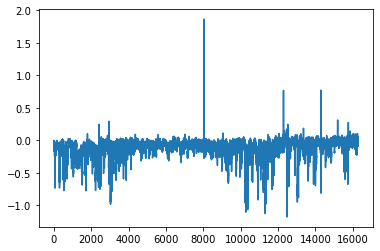

In [15]:
krakov_df['12'].plot()

# LDS experiment

I will try with this jax code to run a linear dynamical system with hidden states

In [191]:

import jax.numpy as np
import jax.random as jr

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec 

from ssm.lds.models import GaussianLDS
from ssm.plots import plot_dynamics_2d


In [192]:
# define some parameters for our test_lds
emissions_dim = 93
latent_dim = 6
seed = jr.PRNGKey(32)  # different random seed!

# initialize our test lds model
test_lds = GaussianLDS(num_latent_dims=latent_dim,
                       num_emission_dims=emissions_dim,
                       seed=seed)

In [185]:
krakov_df.resample('1H').mean()

,12,13,15,16,17,18,24,25,26,27,...,111,112,113,114,115,116,117,118,119,120
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-08 15:00:00,-0.003523,0.042046,0.341372,0.018782,0.117385,0.469542,0.004058,0.026456,0.081814,0.046262,...,0.026082,0.019182,0.021737,0.015301,0.041879,0.016196,0.027027,0.014819,0.034483,0.012276
2018-01-08 16:00:00,-0.111995,-0.010374,0.013336,0.006959,0.043493,0.173972,0.002466,-0.003106,0.083995,0.037358,...,0.020168,0.014091,0.028521,0.012774,0.040060,0.013115,0.017842,0.016942,0.032326,0.019601
2018-01-08 17:00:00,-0.119545,0.019669,0.054292,0.021904,0.136899,0.547596,0.000879,0.021285,0.073970,0.147613,...,0.017717,0.017035,0.024273,0.011818,0.043912,0.014964,0.016378,0.011206,0.032507,0.019214
2018-01-08 18:00:00,-0.110772,0.002399,0.089813,0.028140,0.175874,0.703498,0.004756,0.042866,0.097930,0.291938,...,0.021535,0.013947,0.019685,0.014751,0.049146,0.015329,0.030049,0.022139,0.032412,0.018580
2018-01-08 19:00:00,-0.122470,0.032840,0.165615,0.028399,0.177491,0.709964,0.010923,0.018421,0.092324,0.158711,...,0.026437,0.012632,0.026246,0.013453,0.066393,0.016967,0.023685,0.024929,0.037867,0.026070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-10 03:00:00,0.008106,0.055040,0.262020,0.128502,0.803139,3.212556,0.014173,0.055953,0.253336,0.426808,...,0.030903,0.013312,0.023798,0.015876,0.048721,0.020926,0.022978,0.017736,0.025753,0.018239
2019-04-10 04:00:00,-0.000009,0.061371,0.473349,0.124479,0.777995,3.111979,0.015879,0.054982,0.189658,0.693440,...,0.029888,0.014957,0.022898,0.016249,0.041682,0.017663,0.020925,0.019102,0.031185,0.015051
2019-04-10 05:00:00,0.044061,0.070677,0.262648,0.108932,0.680825,2.723299,0.011242,0.042279,0.144678,0.394861,...,0.028409,0.013479,0.017535,0.008981,0.033470,0.015069,0.014971,0.006335,0.022853,0.019181


<AxesSubplot:xlabel='timestamp'>

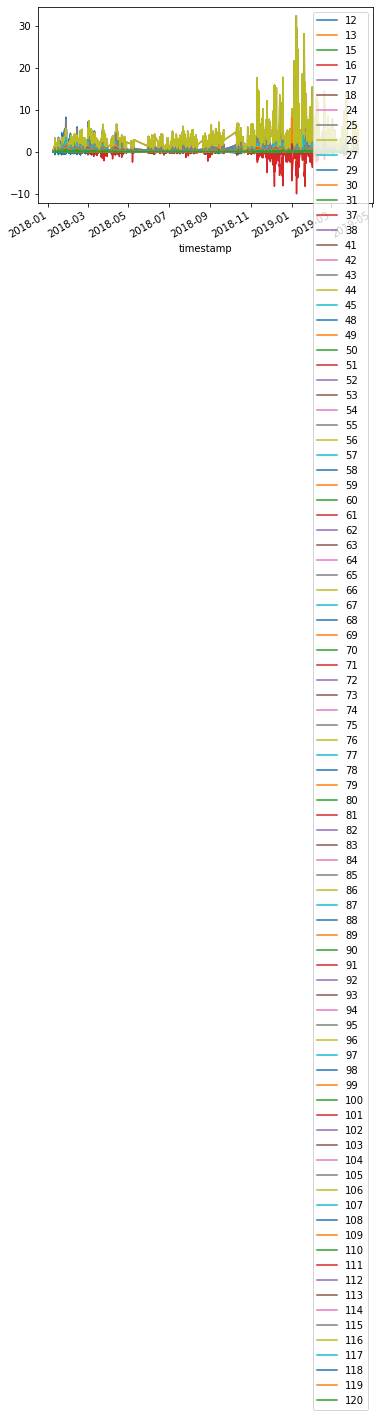

In [200]:
krakov_df.plot()

In [203]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
scaler = StandardScaler()
imputer = SimpleImputer()
krakov_array = scaler.fit_transform(krakov_df)
krakov_array = imputer.fit_transform(krakov_array)
krakov_array = krakov_array
krakov_df_2= pd.DataFrame(data=krakov_array, columns =krakov_df.columns, index =krakov_df.index)
krakov_array = np.expand_dims(krakov_array,axis=0)
krakov_df_2.plot()

In [207]:
np.std(krakov_array,axis=1)

DeviceArray([[1.        , 1.        , 1.        , 1.        , 1.        ,
              1.        , 1.        , 0.99999994, 1.        , 1.        ,
              0.99999994, 0.99999994, 1.        , 1.        , 1.        ,
              1.        , 1.        , 0.99999994, 1.        , 1.        ,
              1.        , 1.        , 0.99999994, 0.99999994, 0.99999994,
              0.99999994, 1.        , 1.        , 0.99999994, 1.        ,
              0.99999994, 1.        , 1.        , 1.        , 1.        ,
              1.        , 1.        , 1.        , 1.        , 1.        ,
              1.        , 1.        , 0.99999994, 1.        , 0.99999994,
              0.99999994, 1.        , 1.        , 1.        , 0.99999994,
              0.99999994, 1.        , 1.        , 1.        , 1.        ,
              0.99999994, 1.        , 1.        , 0.99999994, 0.99999994,
              1.        , 1.        , 1.        , 1.        , 1.        ,
              1.        , 1.        , 

In [208]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
lps, fitted_lds, posteriors = test_lds.fit(krakov_array, method="em",key=seed)

  0%|          | 0/100 [00:00<?, ?it/s]

AssertionError: NaNs in marginal log probability

In [85]:
posteriors.mean()[0].shape

(16286, 2)

In [86]:
import matplotlib.pyplot as plt
posteriors.mean()[0]

DeviceArray([[nan, nan],
             [nan, nan],
             [nan, nan],
             ...,
             [nan, nan],
             [nan, nan],
             [nan, nan]], dtype=float32)

Thus it is challenging out of the box, I could try some more robust implementations.